In [1]:
import numpy as np
from scipy.special import lambertw
import matplotlib.pyplot as plt
import math

In [144]:
def ssqrt(x):
    if x >=1:
        ssqrt = math.log(x) / lambertw(math.log(x))
        return np.real(ssqrt)
    else:
        return 0
        
def inf(x):
    inf = -lambertw(-np.log(x)) / np.log(x)
    if 1/np.e <= x <= np.e:
        return np.real(inf)
    else:
         print('Input must be between 1/e and e^1/e.')

In [3]:
pyth = np.sqrt(2)
print(inf(1/pyth))
w = 1/ssqrt(pyth)
print(w)

0.7666646959621229
0.766664695962123


In [173]:
def tet_linear(h, b=2):
    if h == -2:
        return np.NINF
    if -2 < h <= 0:
        return math.log((h+2),b)
    elif 0 < h <= 2:
        return b**h
    elif 2 < h <= 3:
        return b**b**(h-1)
    elif 3 < h <=4:
        return b**b**b**(h-2)
    #return approx

In [181]:
def quad(h, b=2):
        deg1 = (2*np.log(b)*h)/(1+np.log(b))
        deg2 = (1-np.log(b))*h**2/(1+np.log(b))
        return 1 + deg1 - deg2
    
def tet_quadratic(h, b=2):
    if h == -2:
        return np.NINF
    if -2 < h <= -1:
        return math.log(cube(h+1),b)#np.log2(quad(h+1))
    elif -1 < h <= 0:
        return quad(h, b=b)
    elif 0 < h <= 1:
        return b**(quad(h-1, b=b))
    elif 1 < h <=2:
        return b**b**(quad(h-2, b=b))
    elif 2 < h <= 3:
        return b**b**b**(quad(h-3, b=b))
    elif 3 < h <= 4:
        return b**b**b**b**(quad(h-4, b=b))
    #return approx

In [115]:
5*np.log(7)**2 == 5*(np.log(7)**2)

True

In [183]:
def cube(h, b=2):
        denom = 2 + 4*np.log(b) + 5*np.log(b)**2 + 2*np.log(b)**3
        deg1 = h**1 * (6*np.log(b) + 6*np.log(b)**3)
        deg2 = h**2 * (9*np.log(b)**2 - 6*np.log(b)**3)
        deg3 = h**3 * (2 - 2*np.log(b) - 4*np.log(b)**2 + 2*np.log(b)**3)
        return 1 + (deg1 + deg2 + deg3)/denom

def tet_cubic(h, b=2):
    if h == -2:
        return np.NINF
    if -2 < h <= -1:
        approx = math.log(cube(h+1),b)#np.log2(cube(h+1))
    elif -1 < h <= 0:
        approx = cube(h)
    elif 0 < h <= 1:
        approx = b**(cube(h-1, b=b))
    elif 1 < h <=2:
        approx = b**b**(cube(h-2, b=b))
    elif 2 < h <= 3:
        approx = b**b**b**(cube(h-3, b=b))
    elif 3 < h <= 4:
        approx = b**b**b**b**(cube(h-4, b=b))
    return approx

In [126]:
test = 0.5
print('%.6f'%tet_linear(test))
print('%.6f'%tet_quadratic(test))
#print('%.6f'%tet_cubic(test))

1.414214
1.459332


In [24]:
x=np.arange(-2,4,step=2**-4)
#for i in range(0,len(x)):
    #print(x[i], tet_linear(x[i]))
tet_quadratic(x[60])

3.298650087655434

<IPython.core.display.Javascript object>


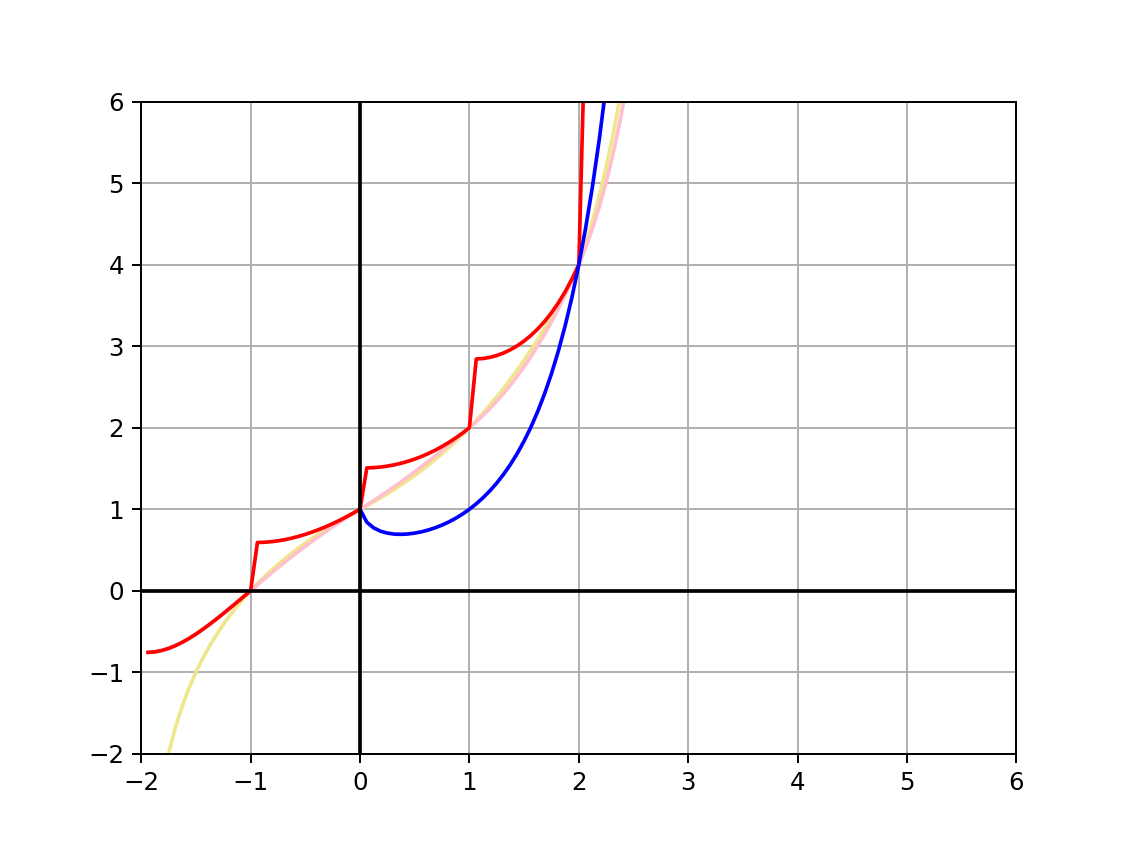

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in power


In [184]:
x=np.arange(-2,4,step=2**-4)

linears = []
for i in range(0, len(x)):
    linear = tet_linear(x[i])
    linears.append(linear)

quads = []
for j in range(0, len(x)):
    q = tet_quadratic(x[j])
    quads.append(q)

cubes = []
for j in range(0, len(x)):
    c = tet_cubic(x[j])
    cubes.append(c)

%matplotlib notebook
plt.plot(x, linears, c='khaki')
plt.plot(x, quads, c='pink')
plt.plot(x, cubes, c='r')
plt.plot(x, x**x, c='b')

plt.grid()
plt.axhline(y=0,c='k')
plt.axvline(x=0,c='k')
#plt.axis('scaled')
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.show()

In [199]:
def quad_half(b, h=1/2):
        deg1 = (2*np.log(b)*h)/(1+np.log(b))
        deg2 = (1-np.log(b))*h**2/(1+np.log(b))
        return 1 + deg1 - deg2
    
def tet_quadratic_half(b, h=1/2):
    if h == -2:
        return np.NINF
    if -2 < h <= -1:
        return math.log((quad(b=b,h=h+1)), b)
    elif -1 < h <= 0:
        return quad_half(h, b)
    elif 0 < h <= 1:
        return b**(quad_half(b=b,h=h-1))
    elif 1 < h <=2:
        return b**b**(quad_half(b=b,h=h-2))
    elif 2 < h <= 3:
        return b**b**b**(quad_half(b=b,h=h-3))
    elif 3 < h <= 4:
        return b**b**b**b**(quad_half(b=b,h=h-4))
    #return approx

In [134]:
print(tet_quadratic(0.5))
print(tet_quadratic_half(2))

1.4593319179742001
1.4593319179742001


In [152]:
ssqrt(x2[0])

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in cdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher

<IPython.core.display.Javascript object>


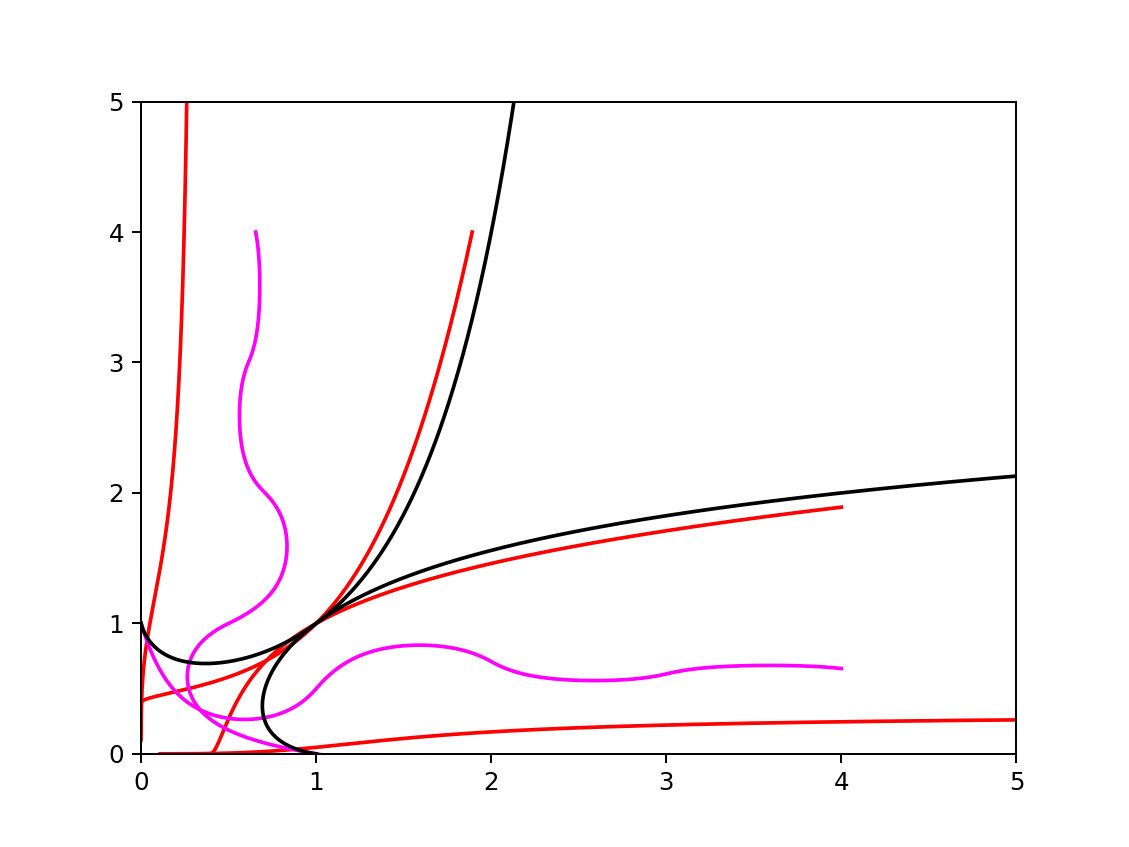

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in power


In [244]:
x2 = np.arange(-2,4,2**-16)

constbase = []
for j in range(0, len(x2)):
    cb= tet_quadratic(h=x2[j],b=0.5)
    constbase.append(cb)

constheight = []
for j in range(0, len(x2)):
    ch = tet_quadratic(b=x2[j],h=0.5)
    constheight.append(ch)

tet_quadratic_half(x2)
plt.plot(x2, constheight, c='r')
plt.plot(constheight, x2, c='r')
plt.plot(x2, constbase, c='magenta')
plt.plot(constbase, x2,  c='magenta')
plt.plot(x2**x2, x2, c='k')
plt.plot(x2, x2**x2,  c='k')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

In [225]:
max(constbase)

4.499110076245954

# Pentation

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
D

<IPython.core.display.Javascript object>


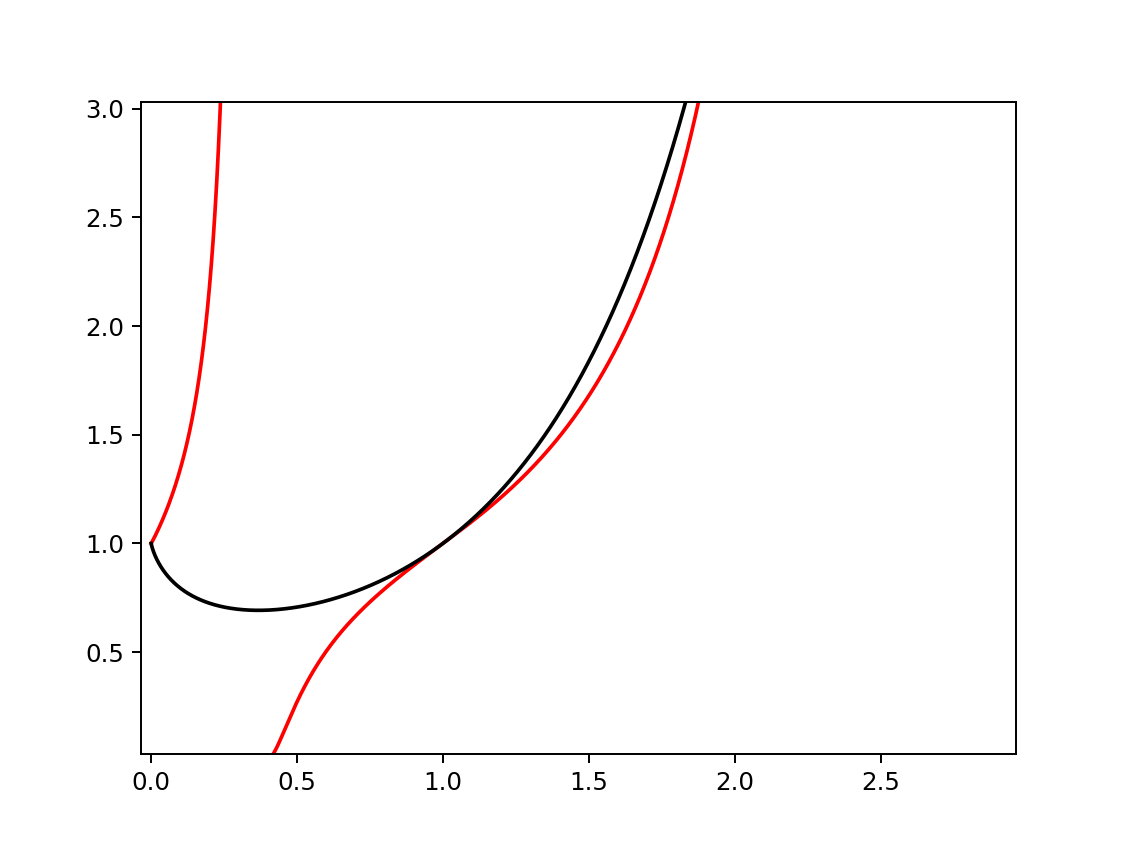

D:\Python\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2483: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta


In [211]:
x2 = np.arange(0,12,2**-16)

pents = []
for j in range(0, len(x2)):
    p = tet_quadratic(b=x2[j],h=x2[j])
    pents.append(p)

tet_quadratic_half(x2)
plt.plot(x2, pents, c='r')
#plt.plot(x2**x2, x2, c='k')
plt.plot(x2, x2**x2,  c='k')
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()